## Overfitting Control

# MNIST dataload

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # train test split
x_train, x_test = x_train/255., x_test/255. # normalize

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
n_train = x_train.shape[0]
n_test = x_test.shape[0]

print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


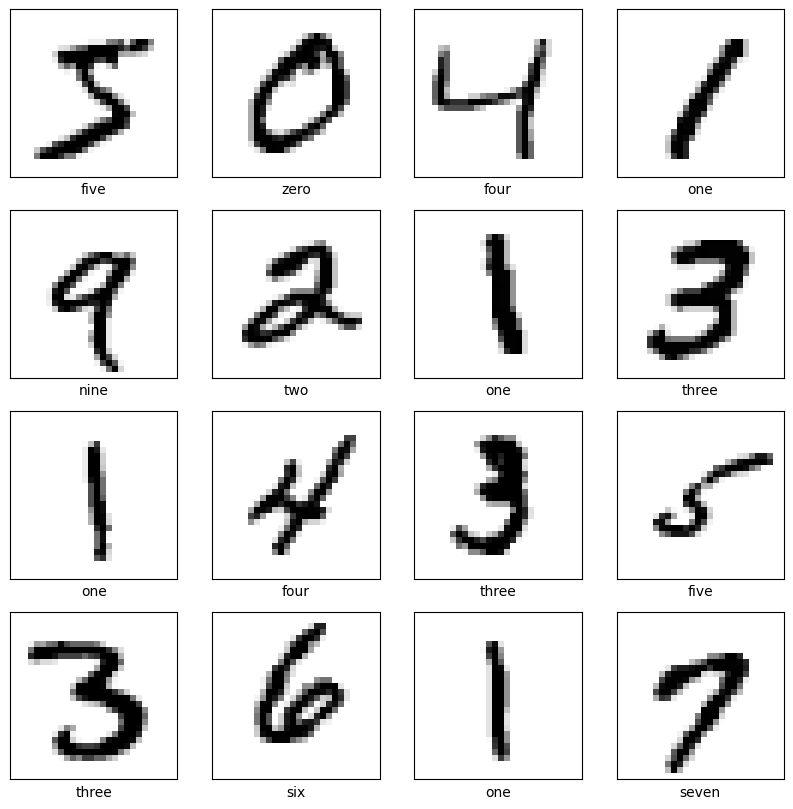

In [4]:
class_name = ['zero', 'one', 'two', 'three', 'four', 'five',
              'six', 'seven','eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  img = x_train[i]
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_name[y_train[i]])
plt.show()

# Neural Architecture

# 1) Neural Model with SGD

In [5]:
# Model Build
model0 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Hyper-parameter tunning (optmizer, cost function)
model0.compile(optimizer='SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Training
history = model0.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6548 - accuracy: 0.8358
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3375 - accuracy: 0.9063
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2890 - accuracy: 0.9196
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2580 - accuracy: 0.9285
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2346 - accuracy: 0.9352


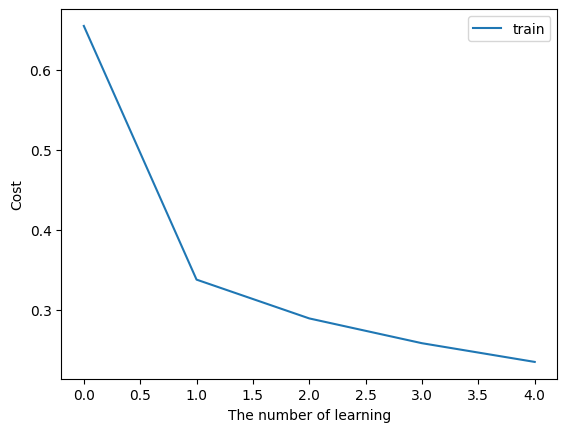

In [7]:
# Visualization
plt.plot(history.history['loss'], label='train')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [8]:
loss, accuracy = model0.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", accuracy * 100)

313/313 - 1s - loss: 0.2207 - accuracy: 0.9379 - 630ms/epoch - 2ms/step
Accuracy:  93.79000067710876


# Basic Neural Model with Adam

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2605 - accuracy: 0.9256
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1129 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0796 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0587 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9863


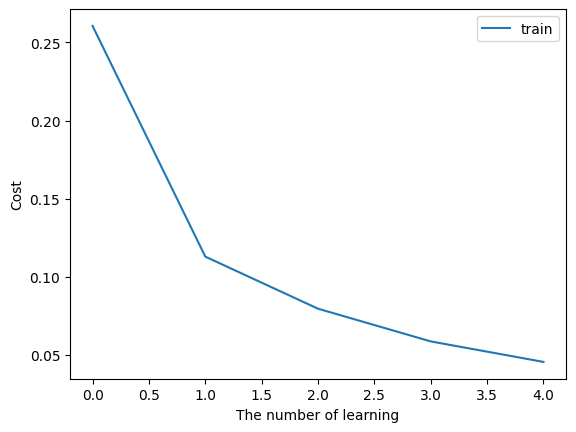

313/313 - 1s - loss: 0.0728 - accuracy: 0.9775 - 674ms/epoch - 2ms/step
Accuracy:  97.75000214576721


In [9]:
# Model Build
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Hyper-parameter tunning (optmizer, cost function)
model1.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model1.fit(x_train, y_train, epochs=5)

# Visualization
plt.plot(history.history['loss'], label='train')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Evaluation
loss, accuracy = model1.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", accuracy * 100)

#  Neural Model with Adam & Dropout

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2939 - accuracy: 0.9154
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1408 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1040 - accuracy: 0.9690
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0725 - accuracy: 0.9772


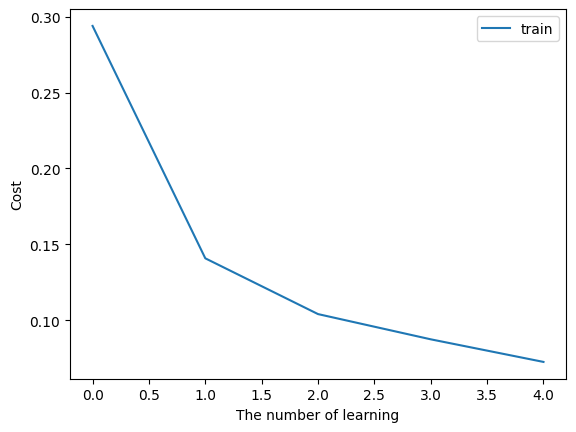

313/313 - 1s - loss: 0.0695 - accuracy: 0.9785 - 608ms/epoch - 2ms/step
Accuracy:  97.85000085830688


In [10]:
# Model Build
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2), # Dropout
    tf.keras.layers.Dense(10, activation='softmax')
])

# Hyper-parameter tunning (optmizer, cost function)
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model2.fit(x_train, y_train, epochs=5)

# Visualization
plt.plot(history.history['loss'], label='train')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Evaluation
loss, accuracy = model2.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", accuracy * 100)

#  Neural Model with Adam & Regularization

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4559 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1908 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1495 - accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1273 - accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1128 - accuracy: 0.9781


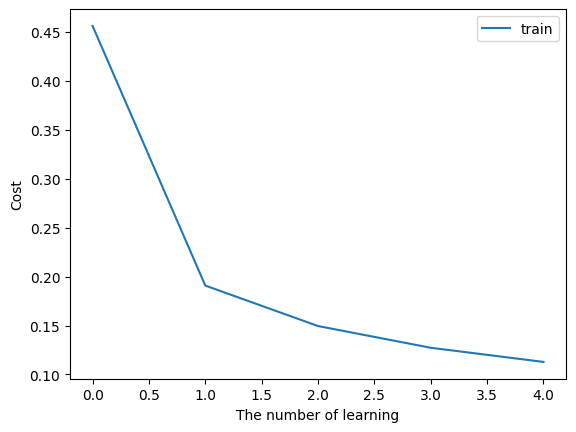

313/313 - 2s - loss: 0.1480 - accuracy: 0.9670 - 2s/epoch - 5ms/step
Accuracy:  96.70000076293945


In [11]:
# Model Build
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, kernel_regularizer = tf.keras.regularizers.l2(0.01), activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Hyper-parameter tunning (optmizer, cost function)
model2.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model2.fit(x_train, y_train, epochs=5)

# Visualization
plt.plot(history.history['loss'], label='train')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Evaluation
loss, accuracy = model2.evaluate(x_test, y_test, verbose=2)
print("Accuracy: ", accuracy * 100)

# Clustering

In [12]:
from sklearn.datasets import make_moons # 초승달 모양의 분포를 지닌 두 종류의 데이터

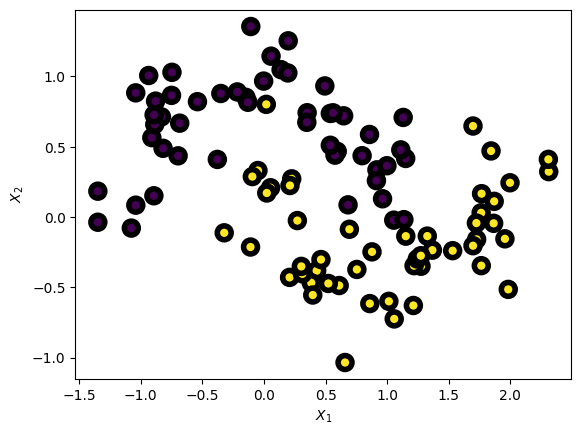

[[ 1.36698238 -0.23541584]
 [ 1.76404402 -0.34563288]
 [-0.37868174  0.41004375]
 [ 1.15113747 -0.13597622]
 [ 2.31168314  0.32295125]]
[1 1 0 1 1]


In [22]:
# data load
X, y = make_moons(n_samples = 100, noise = 0.2, random_state = 1) # sample number, noise size, random state

# Visualization
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth = 4)
# X[:,0]: label '0' , x[:,1]: label'1'
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

print(X[0:5, :])
print(y[0:5])

In [23]:
from pandas import DataFrame # pandas

In [24]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

,x,y,label
0,1.366982,-0.235416,1
1,1.764044,-0.345633,1
2,-0.378682,0.410044,0
3,1.151137,-0.135976,1
4,2.311683,0.322951,1


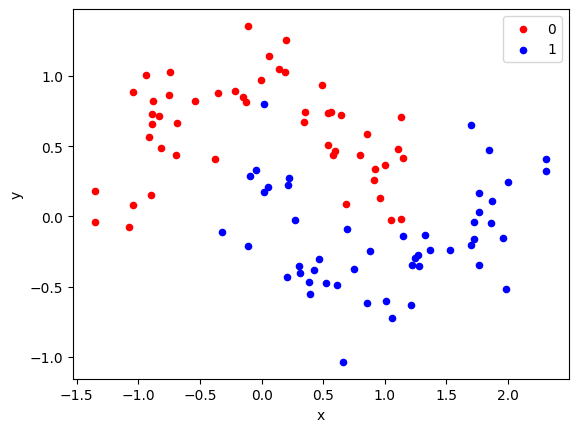

In [25]:
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
gropued = df.groupby('label')
for key, group in gropued: # key = label, group = data
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [26]:
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]

# No EarlyStopping

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
history = model.fit(trainX, trainy, validation_data = (testX, testy),
                    epochs=4000, verbose=0)

In [ ]:
train_loss, train_acc = model.evaluate(trainX, trainy, verbose=0)
test_loss, test_acc = model.evaluate(testX, testy, verbose=0)

print(f"Train acc: {train_acc}, Test acc: {test_acc}")

Train acc: 1.0, Test acc: 0.9142857193946838


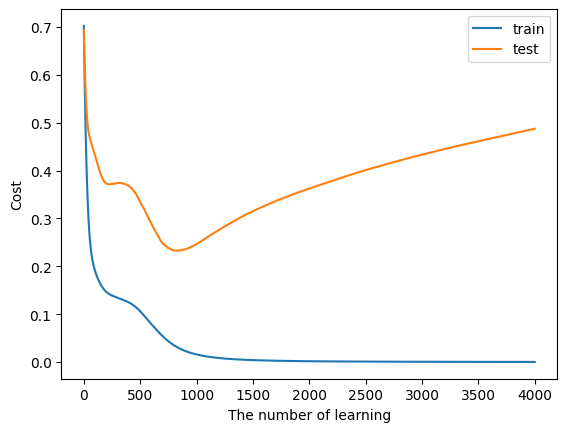

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# EarlyStopping without patience

Epoch 227: early stopping
Train acc: 0.9666666388511658, Test acc: 0.8142856955528259


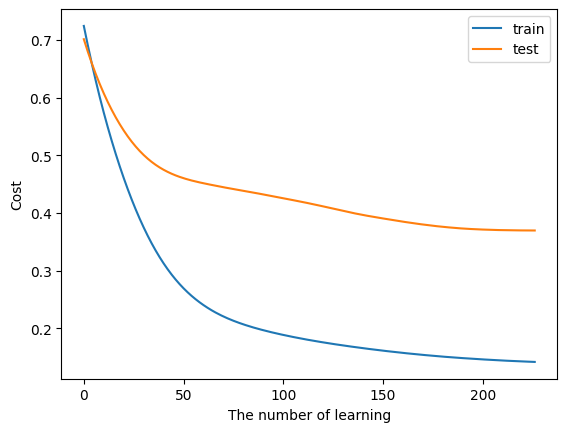

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model1.fit(trainX, trainy, validation_data = (testX, testy),
                    epochs=4000, verbose=0, callbacks=[es])

train_loss, train_acc = model1.evaluate(trainX, trainy, verbose=0)
test_loss, test_acc = model1.evaluate(testX, testy, verbose=0)

print(f"Train acc: {train_acc}, Test acc: {test_acc}")

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# EarlyStopping with patience

Epoch 922: early stopping
Train acc: 1.0, Test acc: 0.9428571462631226


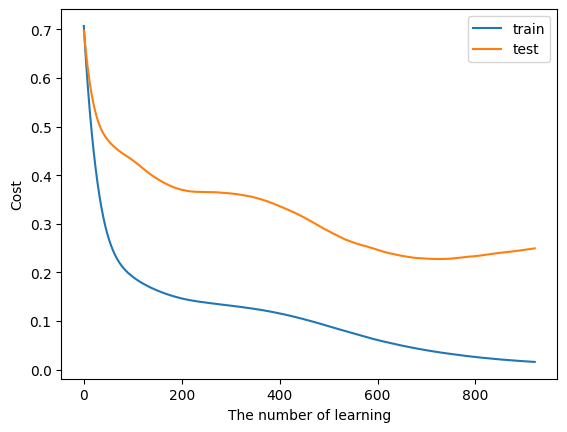

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(500, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200) # with 200 patience

history = model2.fit(trainX, trainy, validation_data = (testX, testy),
                    epochs=4000, verbose=0, callbacks = [es])

train_loss, train_acc = model2.evaluate(trainX, trainy, verbose=0)
test_loss, test_acc = model2.evaluate(testX, testy, verbose=0)

print(f"Train acc: {train_acc}, Test acc: {test_acc}")

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("The number of learning")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Data Split Appendix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
'''
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:,:]
trainy, testy = y[:n_train], y[n_train:]
'''

In [ ]:
x_train, x_test = train_test_split(X, test_size=0.3)
y_train, y_test = train_test_split(y, test_size=0.3)

print(x_train.shape, x_test.shape)
print(x_train.shape, y_test.shape)

(70, 2) (30, 2)
(70, 2) (30,)


In [ ]:
x_train, x_validate = train_test_split(x_train, test_size=0.3)
y_train, y_validate = train_test_split(y_train, test_size=0.3)

print(x_train.shape, x_validate.shape, x_test.shape)
print(y_train.shape, y_validate.shape, y_test.shape)

(49, 2) (21, 2) (30, 2)
(49,) (21,) (30,)


# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
x = np.random.rand(5,5) * 1000
print(x)

[[236.37372138  67.4728654  889.1062823  561.1353035  191.38532351]
 [746.36250159  92.35363502 128.54322612 108.49157384 353.10048148]
 [673.3844796  734.7410641  760.98411268 983.26464345 202.82746593]
 [803.57916563  79.26219033 691.56641875 860.20938727 637.68924843]
 [961.59849032 646.66721861 610.07133782 190.98379101 392.23091957]]


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[0.         0.         1.         0.51744132 0.        ]
 [0.70321479 0.03728751 0.         0.         0.36234312]
 [0.60258664 1.         0.831543   1.         0.02563756]
 [0.78210986 0.01766805 0.74027155 0.85932894 1.        ]
 [1.         0.86800833 0.63312056 0.09430128 0.45001978]]


In [ ]:
x[:,0]

array([236.37372138, 746.36250159, 673.3844796 , 803.57916563,
       961.59849032])

In [ ]:
max_x = np.max(x[:,0])
min_x = np.min(x[:,0])

(x[:,0]-min_x) / (max_x - min_x)

array([0.        , 0.70321479, 0.60258664, 0.78210986, 1.        ])